## TP1: Performance evaluation

In this practical session you  are going to manipulate the sklearn library.
The main goal is to analyze the performance of several methods on a binary classification task.
You will experiment with different metrics that can be used to evaluate the performance.


## Dataset loading

The breast cancer dataset is a binary classification dataset.
We are first interested to know the input dimensionality, the number of samples, the number of positive samples and the ratio of positive samples in the dataset.

In [451]:
from sklearn import datasets
import numpy as np
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

input_dimension = len(X[0]) # TODO
nb_samples = len(X) # TODO

from numpy import sum
nb_positives = y.sum() # TODO
positive_ratio = y.sum()/len(y) # TODO
 
print("Input dimension: ", input_dimension)
print("Nb of samples in the full dataset: ", nb_samples)
print("Nb of positive samples", nb_positives)
print("Positive Ratio:", positive_ratio)


Input dimension:  30
Nb of samples in the full dataset:  569
Nb of positive samples 357
Positive Ratio: 0.6274165202108963


*Q*: What is the sample dimension? 

*A*: The sample dimension is 30

*Q*: How many samples does the dataset contain?

*A*: The dataset contains 569 dataset

*Q*: What is the positive ratio in the dataset?

*A*: The positive ratio is approximately 63%

### Dataset split
Now we are going to perform a split of the data for the evaluation. Use the train_test_split function with a test_size parameter of 0.3.

Then compute the number of samples in the train and test set, as well as their positive ratio.

In [452]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3) # TODO

nb_samples_train = len(X_train) # TODO
nb_samples_test = len(X_test) # TODO

nb_train_positives = y_train.sum() # TODO
nb_test_positives = y_test.sum() # TODO

train_positive_ratio = nb_train_positives/nb_samples_train # TODO
test_positive_ratio = nb_test_positives/nb_samples_test # TODO

print("Nb samples train", nb_samples_train)
print("Nb samples test", nb_samples_test)
print("Nb of positive train samples", nb_train_positives)
print("Nb of positive test samples", nb_test_positives)
print("Train Positive Ratio:", train_positive_ratio)
print("Test Positive Ratio:", test_positive_ratio)


Nb samples train 398
Nb samples test 171
Nb of positive train samples 255
Nb of positive test samples 102
Train Positive Ratio: 0.6407035175879398
Test Positive Ratio: 0.5964912280701754


Q: How many samples do you have in the training set?

A: There is 171 samples in the training set.

Q: How many samples in the test set?

A: There is 398 samples in the train set.

Q: Are the train and test positive ratios similar ? (answer will differ depending on the random state)

A: They are close to each others. It depends on the split.

## Train and evaluate methods

We are now going to train some classification methods on the train data.
For today we are going to use Nearest Neighbor, Logistic Regression and a Decision Tree.

In [453]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=3)
clf_tree = DecisionTreeClassifier();
clf_log = LogisticRegression(max_iter=5000);

clf_nn.fit(X_train, y_train); 
clf_tree.fit(X_train, y_train);
clf_log.fit(X_train, y_train);

Once the classifiers trained, they are ready to ```predict```. Use the prediction functions to obtain the predictions on the test data.

Sometimes it is interesting to not only look at the final prediction, but to have a look at the predicted probability. You can use the ```predict_proba``` function. From its output, for all predictions, you can keep the probability of the second class (having cancer). This is effectively performed with the python selector [:,1].

Q: For the nearest neighbor method, print the difference between the predictions and the probabilities. As you will see they are not zero. Predictions are binary, while probabilities are floats.

In [454]:
y_pred_nn = clf_nn.predict(X_test) # TODO
y_pred_tree = clf_tree.predict(X_test) # TODO
y_pred_log = clf_log.predict(X_test) # TODO

y_proba_nn = clf_nn.predict_proba(X_test)[:,1] # TODO
y_proba_tree = clf_tree.predict_proba(X_test)[:,1]
y_proba_log = clf_log.predict_proba(X_test)[:,1] # TODO

diff = y_pred_nn - y_proba_nn

print("Difference between prediction and probability", diff)


Difference between prediction and probability [ 0.33333333  0.          0.          0.          0.          0.
  0.          0.33333333  0.33333333  0.33333333  0.          0.
 -0.33333333  0.          0.          0.33333333  0.          0.
  0.33333333  0.          0.          0.          0.          0.
  0.          0.          0.          0.33333333  0.          0.
  0.          0.33333333  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.33333333  0.
  0.          0.33333333  0.          0.         -0.33333333  0.33333333
  0.          0.          0.          0.33333333 -0.33333333  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        

To have a sense of the difficulty of the problem it is usually helpful to evaluate simple baselines.
In this case we ask you to generate three baseline results:
- The results of a random method: use ```random.random(N)``` to generate N probabilities between 0 and 1, and use ```rint``` to round them to final binary predictions.
- The results of a methods *always* classifying as "there is cancer", just use the ```ones``` method.
- The results of a methods *never* classifying as "there is cancer", just use the ```zeros``` method.

In [455]:
# create baselines
from numpy import random, zeros, ones, rint
import numpy as np
N = len(y_test)

y_proba_random = random.random(N) # TODO
y_pred_random = rint(y_proba_random) # TODO

y_pred_zeros = np.zeros(N) # TODO
y_pred_ones = np.ones(N) # TODO
y_proba_zeros = np.full(N, 0.01)  # Au lieu de 0, mettons une faible probabilité
y_proba_ones = np.full(N, 0.99)  # Au lieu de 1, mettons une forte probabilité


## Metrics
Now that we have predictions and probabilities of 6 methods we are going to compare them with standard metrics.

First we want to compute their accuracy, precision, recall and f1_score. Use the ```accuracy_score```, ```precision_score```, ```recall_score``` and  ```f1_score``` to compute them.

In [456]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import rint
import numpy as np

def printMetrics(method_title, test_data, pred_data):
    print(method_title) 
    print("\tAccuracy ", accuracy_score(test_data, pred_data)) # TODO
    print("\tPrecision ", precision_score(test_data, pred_data)) # TODO
    print("\tRecall ", recall_score(test_data, pred_data)) # TODO
    print("\tF1 score", f1_score(test_data,pred_data)) # TODO
        
printMetrics("Nearest Neighbors:", y_test,y_pred_nn ) # TODO
printMetrics("Decision Tree:",y_test,y_pred_tree ) # TODO
printMetrics("Logistic Regression:", y_test,y_pred_log ) # TODO
printMetrics("Random:", y_test,y_pred_random ) # TODO
printMetrics("Always:", y_test,y_pred_ones ) # TODO
printMetrics("Never:", y_test,y_pred_zeros ) # TODO


Nearest Neighbors:
	Accuracy  0.935672514619883
	Precision  0.9333333333333333
	Recall  0.9607843137254902
	F1 score 0.9468599033816425
Decision Tree:
	Accuracy  0.9298245614035088
	Precision  0.9411764705882353
	Recall  0.9411764705882353
	F1 score 0.9411764705882353
Logistic Regression:
	Accuracy  0.9473684210526315
	Precision  0.9428571428571428
	Recall  0.9705882352941176
	F1 score 0.9565217391304348
Random:
	Accuracy  0.52046783625731
	Precision  0.6282051282051282
	Recall  0.4803921568627451
	F1 score 0.5444444444444444
Always:
	Accuracy  0.5964912280701754
	Precision  0.5964912280701754
	Recall  1.0
	F1 score 0.7472527472527473
Never:
	Accuracy  0.40350877192982454
	Precision  0.0
	Recall  0.0
	F1 score 0.0


/home/samy/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Q: What do you observe from these results?

A: all the 3 methods are quite accurate and precise.

Q: Explain the value of each metrics

Accuracy is the proportion of "true" values : when the machine predicts in the right way.

Precision is like accuray but only for the positive predictions : proportion of when the machine predicts the positive values in the right way.

Recall is the proportion of true positive among all the positive predictions (true positive + false negative).

F1 score is the proportion of false negative among the negative predictions (true negative + false positive).


Q: From these results, what is your initial ranking for each methods?

log, tree, nn 

### The ROC curve

To create a ROC curve we need first to compute the false positive rate and the true positive rate.
For that we should use the probabilities (before binarization). Compute the  positive rates for all 6 methods.

In [457]:
from sklearn.metrics import roc_curve

false_positive_rate_nn, true_positive_rate_nn, _ = roc_curve(y_test, y_proba_nn)
false_positive_rate_tree, true_positive_rate_tree, _ = roc_curve(y_test, y_proba_tree)
false_positive_rate_log, true_positive_rate_log, _ = roc_curve(y_test, y_proba_log)
false_positive_rate_random, true_positive_rate_random, _ = roc_curve(y_test, y_proba_random)
false_positive_rate_zeros, true_positive_rate_zeros, _ = roc_curve(y_test, y_proba_zeros)
false_positive_rate_ones, true_positive_rate_ones, _ = roc_curve(y_test, y_proba_ones)


To plot a ROC curve you need to plot the False positive rate against the True positive rate.
Complete the function definition and give the proper arguments to do the plots.

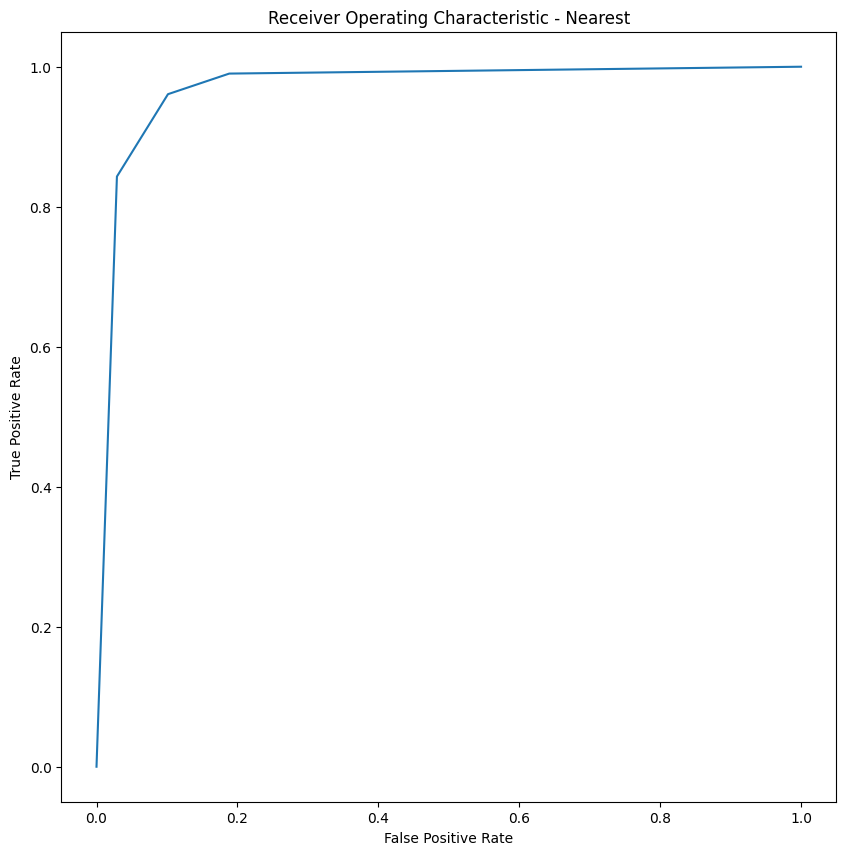

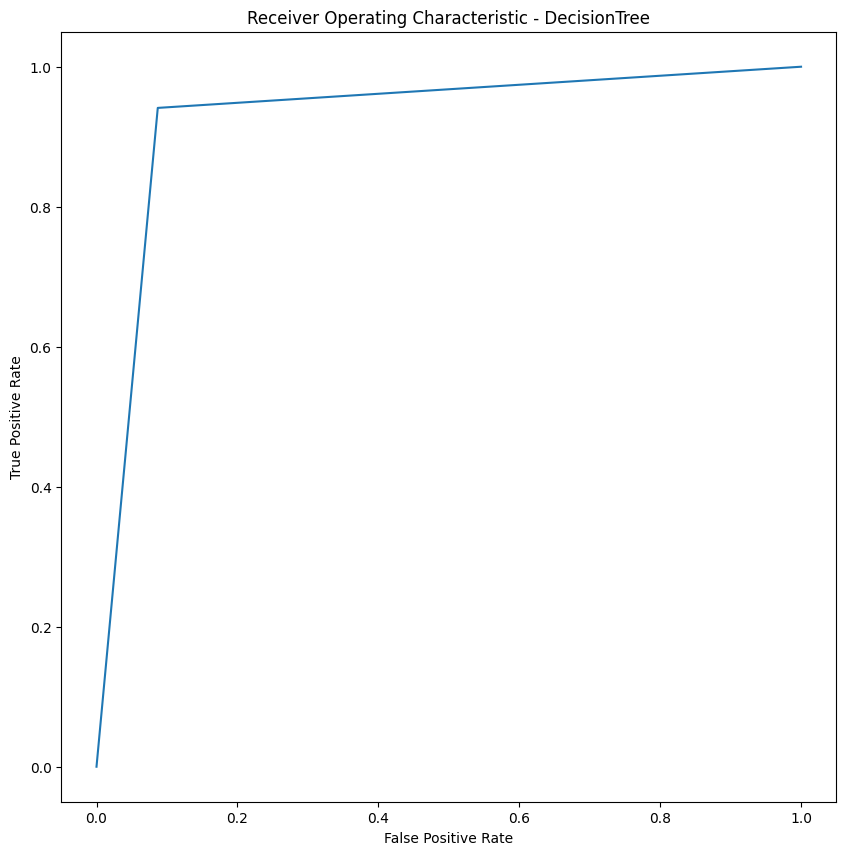

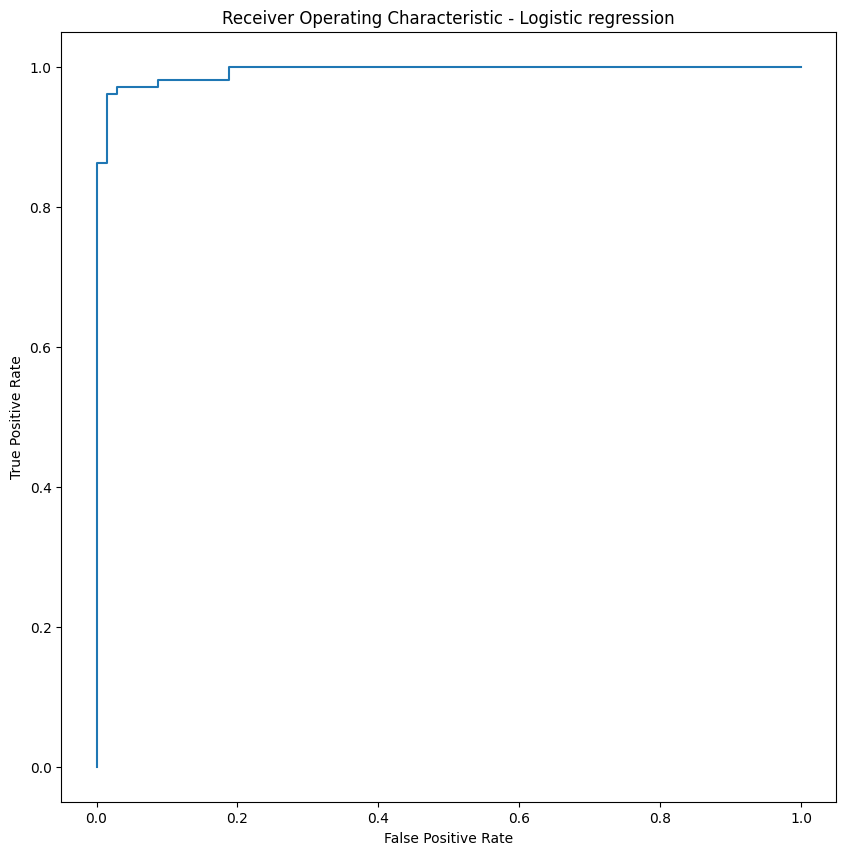

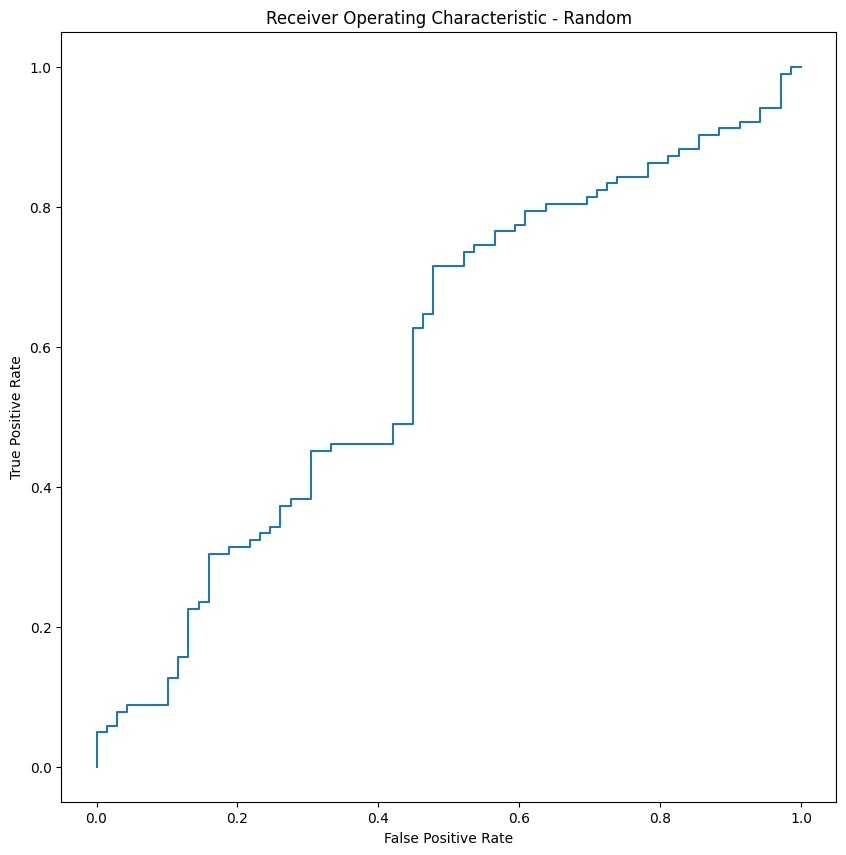

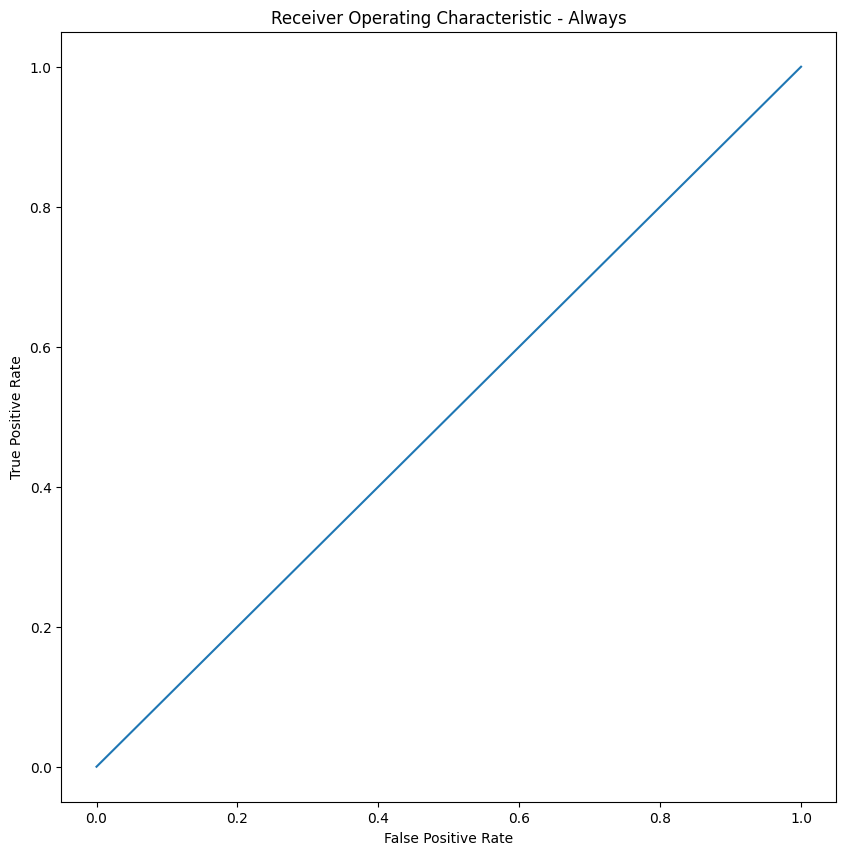

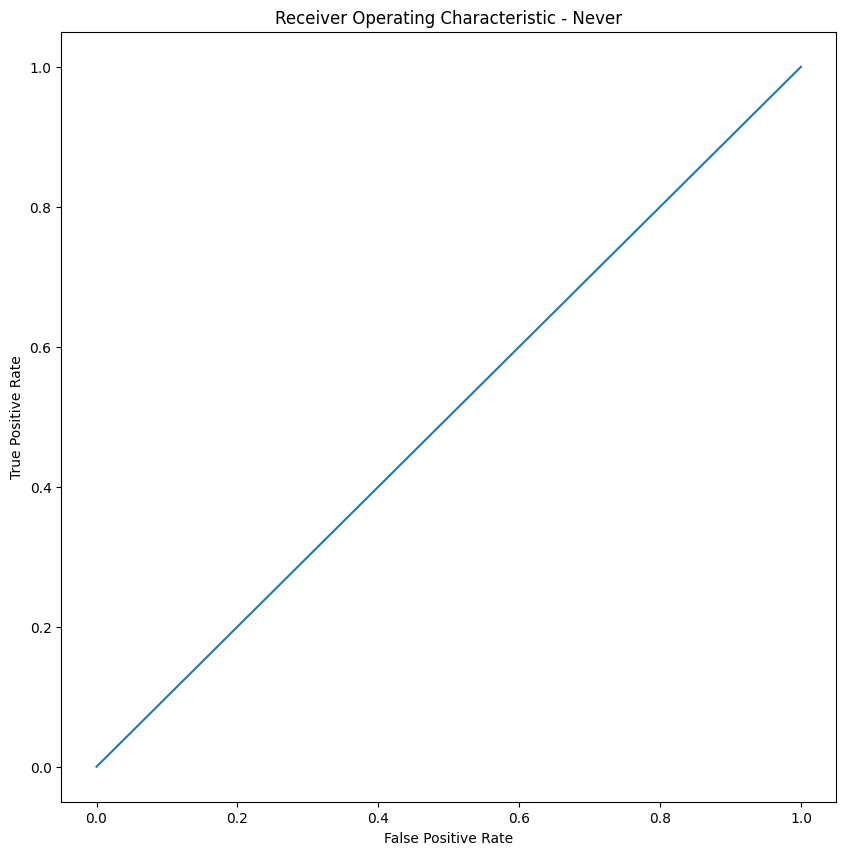

In [458]:
import matplotlib.pyplot as plt

def plotROC(title, fp, tp): # TODO: add FP and TP
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - ' + title)
    plt.plot(fp, tp) # TODO plot values one against each other
    #plt.plot([0, 1], ls="--") # This draws the diagonal
    #plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") # This draws the "perfect" score
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plotROC("Nearest",false_positive_rate_nn, true_positive_rate_nn ); # TODO add FP and TP
plotROC("DecisionTree",false_positive_rate_tree, true_positive_rate_tree); # TODO add FP and TP
plotROC("Logistic regression",false_positive_rate_log, true_positive_rate_log); # TODO add FP and TP
plotROC("Random",false_positive_rate_random, true_positive_rate_random); # TODO add FP and TP
plotROC("Always",false_positive_rate_ones, true_positive_rate_ones); # TODO add FP and TP
plotROC("Never",false_positive_rate_zeros, true_positive_rate_zeros); # TODO add FP and TP


Q: Compare the curves. What do you see?

A : there is a lot of discontinuity in the logistic curb on the opposite of the 2 others.

The three method have a roc curb close to the "perfect" one.

For the random curve, it is logical to see that there is equal distribution between the false positive rate and the true positive rate.

Q: Particularly, compare the "Always cancer" and "Never cancer" curves. Why do you get these curves? Discuss their similarities and or differences.

Q: Would your preliminary ranking of the methods change after seeing these curves? Explain why or why not.

A: yes


For a better comparison you can plot all curves in the same plot.
Use the parameter ```label='Data label'``` in the plot function to know which one is each and the ```plot.legend(loc="lower right")``` to show the legend.

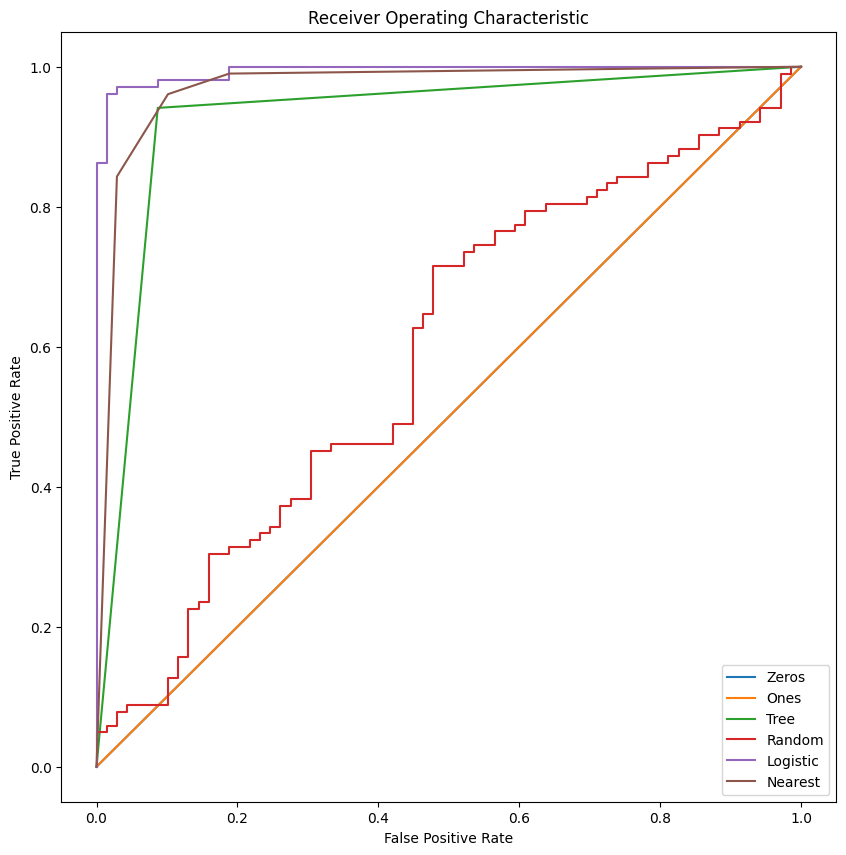

In [459]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_zeros, true_positive_rate_zeros, label="Zeros"); # TODO
plt.plot(false_positive_rate_ones, true_positive_rate_ones,  label="Ones"); # TODO
plt.plot(false_positive_rate_tree, true_positive_rate_tree,  label="Tree"); # TODO
plt.plot(false_positive_rate_random, true_positive_rate_random,  label="Random"); # TODO
plt.plot(false_positive_rate_log, true_positive_rate_log,  label="Logistic"); # TODO
plt.plot(false_positive_rate_nn, true_positive_rate_nn ,  label="Nearest"); # TODO

#plt.plot([0, 1], ls="--")
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()



To compute the Roc Area Under Curve (AUC) score you can use the function ```roc_auc_score```

In [460]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for Nearest: ', roc_auc_score(y_test, y_proba_nn)) # TODO
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_proba_tree)) # TODO
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_proba_log)) # TODO
print('roc_auc_score for Random Guessing: ', roc_auc_score(y_test, y_proba_random)) # TODO
print('roc_auc_score for Always No Cancer: ', roc_auc_score(y_test, y_pred_zeros)) # TODO
print('roc_auc_score for Always Cancer: ', roc_auc_score(y_test, y_pred_ones)) # TODO


roc_auc_score for Nearest:  0.9700198920147771
roc_auc_score for DecisionTree:  0.9271099744245526
roc_auc_score for Logistic Regression:  0.9937482239272522
roc_auc_score for Random Guessing:  0.5907928388746803
roc_auc_score for Always No Cancer:  0.5
roc_auc_score for Always Cancer:  0.5


Q: Do you have a strong preference on which method you would use? Why?

A: Obviously I have a strong preference for the logistic regression method. Its AUC score is the best among the other ones.

### Rerunning the process

Save the current results (screenshot or write down the roc auc scores), then go back to the beginning of the notebook and rerun the script.

Q: Do you get the same numeric results? Why? How to get some control for this variability?

A: I don't get the same results. The method train_test_split splits the samples in different parts at each time I run the script. To get control for this variability I should run the method train_test_split once and rerun every script except this.


## Cross validation

Cross validation is a way to evaluate on the full dataset.
The sklearn library implements the ```KFold``` function that allows to create K splits for train and test.

Use it to obtain splits, plot the positive ratio in each split in the train and in the test and their difference.

Q: What do you observe?



In [461]:
from sklearn.model_selection import KFold

n_splits=10

kfold = KFold(n_splits) # TODO
kfold_splits = kfold.split(X,y)


# each split contains indices for the train and test data
for train_indices, test_indices in kfold_splits:
    # select the data for the fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    # compute ratio of positive examples
    nb_train =  len(X_train)
    train_positive = sum(y_train) # TODO
    train_ratio = train_positive/nb_train # TODO
    
    nb_test = len(X_test) # TODO
    test_positive = sum(y_test) # TODO
    test_ratio = test_positive/nb_test # TODO
    
    print("\nTrain positive Ratio:", train_ratio)
    print("Test positive Ratio:", test_ratio)
    print("Difference:", train_ratio - test_ratio)



Train positive Ratio: 0.67578125
Test positive Ratio: 0.19298245614035087
Difference: 0.48279879385964913

Train positive Ratio: 0.62890625
Test positive Ratio: 0.6140350877192983
Difference: 0.014871162280701733

Train positive Ratio: 0.626953125
Test positive Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.640625
Test positive Ratio: 0.5087719298245614
Difference: 0.13185307017543857

Train positive Ratio: 0.640625
Test positive Ratio: 0.5087719298245614
Difference: 0.13185307017543857

Train positive Ratio: 0.609375
Test positive Ratio: 0.7894736842105263
Difference: -0.18009868421052633

Train positive Ratio: 0.6171875
Test positive Ratio: 0.7192982456140351
Difference: -0.1021107456140351

Train positive Ratio: 0.611328125
Test positive Ratio: 0.7719298245614035
Difference: -0.16060169956140347

Train positive Ratio: 0.611328125
Test positive Ratio: 0.7719298245614035
Difference: -0.16060169956140347

Train positive Ratio: 0.6120857699805068
Te

One way to ensure the same positive rate in the splits is to use Stratified K Fold cross validation.
Adapt the previous code to use ```StratifiedKFold``` and compare the results.

In [462]:
from sklearn.model_selection import StratifiedKFold

n_splits=10

kfold = StratifiedKFold(n_splits) # TODO
kfold_splits = kfold.split(X,y)


# each split contains indices for the train and test data
for train_indices, test_indices in kfold_splits:
    # select the data for the fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    # compute ratio of positive examples
    nb_train =  len(X_train)
    train_positive = sum(y_train) # TODO
    train_ratio = train_positive/nb_train # TODO
    
    nb_test = len(X_test) # TODO
    test_positive = sum(y_test) # TODO
    test_ratio = test_positive/nb_test # TODO
    
    print("\nTrain positive Ratio:", train_ratio)
    print("Test postivie Ratio:", test_ratio)
    print("Difference:", train_ratio - test_ratio)
    


Train positive Ratio: 0.62890625
Test postivie Ratio: 0.6140350877192983
Difference: 0.014871162280701733

Train positive Ratio: 0.62890625
Test postivie Ratio: 0.6140350877192983
Difference: 0.014871162280701733

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.626953125
Test postivie Ratio: 0.631578947368421
Difference: -0.004625822368421018

Train positive Ratio: 0.62768

Q: Compare and discuss the differences between the ```KFold``` and ```StratifiedKFold``` methods.

A : ```KFold``` let the X samples to be split no matter what is the positive ratio of each split. ```StratifiedKFold``` ensures that each split contains the same (approximately) positive ratio, which is better for training.